# 3. 統計學與線性代數

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 3.1 NumPy 和 SciPy modules

In [2]:
import pkgutil as pu
import numpy as np
import matplotlib as mpl
import scipy as sp
import pydoc


print("NumPy version", np.__version__)
print("SciPy version", sp.__version__)
print("Matplotlib version", mpl.__version__)

NumPy version 1.12.0
SciPy version 0.19.0
Matplotlib version 2.0.0


### sub modules

In [3]:
def clean(astr):
    s = astr
    # remove multiple spaces
    s = ' '.join(s.split())
    s = s.replace('=','')
    return s

def print_desc(prefix, pkg_path):
    for pkg in pu.iter_modules(path=pkg_path): # iterate 每一個 modules
        name = prefix + "." + pkg[1]
        
        if pkg[2] == True:
            try:
                docstr = pydoc.plain(pydoc.render_doc(name))  # 取出每個 module 的 DocString
                docstr = clean(docstr)
                start = docstr.find("DESCRIPTION")
                docstr = docstr[start: start + 140]
                print(name, docstr)
            except:
                continue

print_desc("numpy", np.__path__)
print()
print()
print()
print_desc("scipy", sp.__path__)

numpy.compat DESCRIPTION This module contains duplicated code from Python itself or 3rd party extensions, which may be included for the following reasons
numpy.core DESCRIPTION Functions - array - NumPy Array construction - zeros - Return an array of all zeros - empty - Return an uninitialized array - sh
numpy.distutils 
numpy.doc DESCRIPTION Topical documentation  The following topics are available: - basics - broadcasting - byteswapping - constants - creation - gloss
numpy.f2py 
numpy.fft DESCRIPTION Discrete Fourier Transform (:mod:`numpy.fft`)  .. currentmodule:: numpy.fft Standard FFTs ------------- .. autosummary:: :toctre
numpy.lib DESCRIPTION Basic functions used by several sub-packages and useful to have in the main name-space. Type Handling -------------   iscomplexo
numpy.linalg DESCRIPTION Core Linear Algebra Tools ------------------------- Linear algebra basics: - norm Vector or matrix norm - inv Inverse of a squar
numpy.ma DESCRIPTION  Masked Arrays  Arrays sometimes cont

## 3.2 使用 NumPy 進行簡單的描述行統計計算

In [4]:
import numpy as np
from scipy.stats import scoreatpercentile

with open("mdrtb_2012.csv", 'r', encoding = 'cp1252') as f:
    data = np.loadtxt(f, delimiter=',', usecols=(1,), skiprows=1, unpack=True,)    
# country,e_new_mdr_pcnt
# Afghanistan,3.5
# Albania,0.58
# Algeria,1.4  


print("Max method", data.max())
print("Max function", np.max(data))

Max method 50.0
Max function 50.0


In [5]:
print("Min method", data.min())
print("Min function", np.min(data))

Min method 0.0
Min function 0.0


In [6]:
print("Mean method", data.mean())
print("Mean function", np.mean(data))

Mean method 3.2787037037
Mean function 3.2787037037


In [7]:
print("Std method", data.std())
print("Std function", np.std(data))

Std method 5.76332073654
Std function 5.76332073654


In [8]:
print("Median", np.median(data))
print("Score at percentile 50", scoreatpercentile(data, 50))

Median 1.8
Score at percentile 50 1.8


## 3.3 用 NumPy 求逆矩陣

In [9]:
import numpy as np

A = np.mat("2 4 6;4 2 6;10 -4 18")
print("A\n", A)

A
 [[ 2  4  6]
 [ 4  2  6]
 [10 -4 18]]


In [10]:
inverse = np.linalg.inv(A)
print("inverse of A\n", inverse)

inverse of A
 [[-0.41666667  0.66666667 -0.08333333]
 [ 0.08333333  0.16666667 -0.08333333]
 [ 0.25       -0.33333333  0.08333333]]


In [11]:
print("Check\n", A * inverse)

Check
 [[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   8.88178420e-16   1.00000000e+00]]


In [12]:
e = A * inverse - np.eye(3)
e[np.isclose(e, 0)] = 0
print("Error\n", e)

Error
 [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [13]:
b = A * inverse - np.eye(3)
b

matrix([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   4.44089210e-16,   0.00000000e+00],
        [  0.00000000e+00,   8.88178420e-16,  -1.11022302e-16]])

In [14]:
b[np.isclose(b, 0)] = 0
b

matrix([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [15]:
m = np.dot(A, inverse)
m[np.isclose(m, 0)] = 0
m

matrix([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

### 3.3.2 用 NumPy 解線性方程組

In [16]:
import numpy as np

A = np.mat("1 -2 1;0 2 -8;-4 5 9")
print("A\n", A)

b = np.array([0, 8, -9])
print("b\n", b)

A
 [[ 1 -2  1]
 [ 0  2 -8]
 [-4  5  9]]
b
 [ 0  8 -9]


In [17]:
x = np.linalg.solve(A, b)
print("Solution", x)

Solution [ 29.  16.   3.]


In [18]:
print("Check\n", np.dot(A , x))

Check
 [[ 0.  8. -9.]]


In [19]:
A * x.T[:, None]

matrix([[ 0.],
        [ 8.],
        [-9.]])

## 3.4 用 NumPy 計算 Eigenvector / Eigenvalue

In [20]:
import numpy as np

# A = np.mat("3 -2;1 0")
A = np.array([3, -2, 1, 0]).reshape(2, 2)
print("A\n", A)

A
 [[ 3 -2]
 [ 1  0]]


In [21]:
print("Eigenvalues", np.linalg.eigvals(A)) 

Eigenvalues [ 2.  1.]


In [22]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print("eigenvalues", eigenvalues)
print("eigenvectors\n", eigenvectors)

eigenvalues [ 2.  1.]
eigenvectors
 [[ 0.89442719  0.70710678]
 [ 0.4472136   0.70710678]]


In [23]:
for i in range(len(eigenvalues)):
    print("Left", np.dot(A, eigenvectors[:,i]))
    print("Right", eigenvalues[i] * eigenvectors[:,i])

Left [ 1.78885438  0.89442719]
Right [ 1.78885438  0.89442719]
Left [ 0.70710678  0.70710678]
Right [ 0.70710678  0.70710678]


In [24]:
i = 0
np.allclose(np.dot(A, eigenvectors[:, 0]), eigenvalues[i] * eigenvectors[:, 0]) 

True

## 3.5 NumPy 隨機數

### 3.5.1 用 二項式分佈 進行博奕

0 9


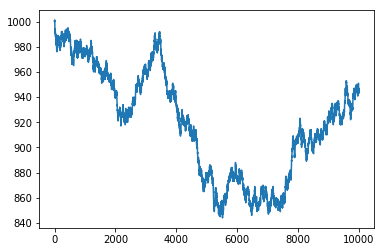

In [25]:
import numpy as np
from matplotlib.pyplot import plot, show

cash = np.zeros(10000)
cash[0] = 1000
outcome = np.random.binomial(9, 0.5, size=len(cash))

for i in range(1, len(cash)):
    if outcome[i] < 5:
        cash[i] = cash[i - 1] - 1
    elif outcome[i] < 10:
        cash[i] = cash[i - 1] + 1
    else:
        raise AssertionError("Unexpected outcome " + outcome)

print(outcome.min(), outcome.max())

plot(np.arange(len(cash)), cash)
show()

### 3.5.2 常態分佈採樣

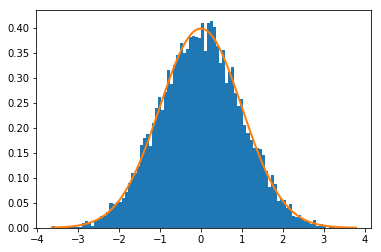

In [26]:
import numpy as np
import matplotlib.pyplot as plt

N=10000

normal_values = np.random.normal(size=N)
dummy, bins, dummy = plt.hist(normal_values, int(np.sqrt(N)), normed=True, lw=1)
sigma = 1
mu = 0
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),lw=2)
plt.show()

### 3.5.3 用 SciPy 進行常態檢驗

In [27]:
import numpy as np
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest

flutrends = np.loadtxt("goog_flutrends.csv", delimiter=',', usecols=(1,), skiprows=1, converters = {1: lambda s: float(s or 0)}, unpack=True)
N = len(flutrends)
normal_values = np.random.normal(size=N)
zero_values = np.zeros(N)

print("Normal Values Shapiro", shapiro(normal_values))
print("Zeroes Shapiro", shapiro(zero_values))
print("Flu Shapiro", shapiro(flutrends))

Normal Values Shapiro (0.9977282285690308, 0.609647274017334)
Zeroes Shapiro (1.0, 1.0)
Flu Shapiro (0.9351992011070251, 2.2946666759787607e-15)


D:\Python\lib\site-packages\scipy\stats\morestats.py:1323: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [28]:
print("Normal Values Anderson", anderson(normal_values))
print("Zeroes Anderson", anderson(zero_values))
print("Flu Anderson", anderson(flutrends))

D:\Python\lib\site-packages\scipy\stats\morestats.py:1427: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s
D:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1776: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
D:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1862: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Normal Values Anderson AndersonResult(statistic=0.19812794221206786, critical_values=array([ 0.572,  0.652,  0.782,  0.912,  1.085]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Zeroes Anderson AndersonResult(statistic=nan, critical_values=array([ 0.572,  0.652,  0.782,  0.912,  1.085]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Flu Anderson AndersonResult(statistic=8.258614154768793, critical_values=array([ 0.572,  0.652,  0.782,  0.912,  1.085]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [29]:
print("Normal Values normaltest", normaltest(normal_values))
print("Zeroes normaltest", normaltest(zero_values))
print("Flu normaltest", normaltest(flutrends))

Normal Values normaltest NormaltestResult(statistic=0.70982109561063966, pvalue=0.70123616751729045)
Zeroes normaltest NormaltestResult(statistic=1.0095473240349975, pvalue=0.60364218712103535)
Flu normaltest NormaltestResult(statistic=99.643733363569538, pvalue=2.3048264115368721e-22)


## 3.6 創見 掩碼式 NumPy 數組

[[83 -- 83 ..., 117 117 --]
 [82 82 83 ..., -- 117 117]
 [80 -- -- ..., -- 117 117]
 ..., 
 [-- 178 178 ..., -- 59 57]
 [-- 178 178 ..., -- -- --]
 [178 178 -- ..., 57 -- --]]


D:\Python\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
D:\Python\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


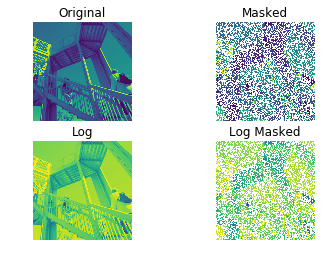

In [30]:
import numpy
import scipy.misc
import matplotlib.pyplot as plt

lena = scipy.misc.ascent()
random_mask = numpy.random.randint(0, 2, size=lena.shape)  # 產生一個 random mask

plt.subplot(221)
plt.title("Original")
plt.imshow(lena)
plt.axis('off')

masked_array = numpy.ma.array(lena, mask=random_mask)  # masked array
print(masked_array)

plt.subplot(222)
plt.title("Masked")
plt.imshow(masked_array)
plt.axis('off')

plt.subplot(223)
plt.title("Log")
plt.imshow(numpy.log(lena))
plt.axis('off')

plt.subplot(224)
plt.title("Log Masked")
plt.imshow(numpy.log(masked_array))
plt.axis('off')

plt.show()

### 忽略負值和極值

Triples [ 0  3  6  9 12 15 18 21 24 27] ...
Signs [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] ...
Signs [-1.  1.  1. -1.  1.  1. -1.  1.  1. -1.] ...
Masked logs [-- 14.970818190308929 15.830413578506539 -- 13.458835614025542
 15.319587954740548 -- 15.648092021712584 13.864300722133706 --] ...
Inside [3750000.0 3175000.0 7500000.0 3000000.0 700000.0 4500000.0 3000000.0
 6250000.0 1050000.0 4600000.0] ...


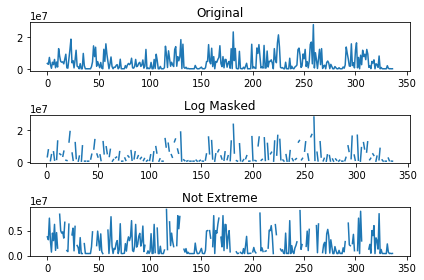

In [31]:
import numpy as np
from datetime import date
import sys
import matplotlib.pyplot as plt

salary = np.loadtxt("MLB2008.csv", delimiter=',', usecols=(1,), skiprows=1, unpack=True)
triples = np.arange(0, len(salary), 3)
print("Triples", triples[:10], "...")

signs = np.ones(len(salary))
print("Signs", signs[:10], "...")

signs[triples] = -1
print("Signs", signs[:10], "...")

ma_log = np.ma.log(salary * signs)  # 對資料取 log，負數本來無法取 log 值，但是因為這邊使用 numpy.ma.log，負數會被自動 mask 掉
print("Masked logs", ma_log[:10], "...")

dev = salary.std()
avg = salary.mean()
inside = np.ma.masked_outside(salary, avg - dev, avg + dev)  # np.ma.masked_outside： 過濾調指定範圍之外的資料
print("Inside", inside[:10], "...")

plt.subplot(311)
plt.title("Original")
plt.plot(salary)

plt.subplot(312)
plt.title("Log Masked")
plt.plot(np.exp(ma_log))  # 還原數值

plt.subplot(313)
plt.title("Not Extreme")
plt.plot(inside)  # 帶通過濾之後的資料

plt.tight_layout()
plt.show()